## Clustering HeLa cell-line feature data | Ascertaining Key Variables for the Hubs and Non-Hubs

#### Author: Shaurya Jauhari
#### Last Reviewed: December 28th, 2020

### Background

<p align = "justify"> This workflow is premised on the idea that with the clustering of the data on read-coverages (for the features), we'll be able to figure out the key variables that are truly representative of the Hubs or Non-Hubs, as defined by our previous analyses. </p>
<p align = "justify"> So, we began with a data matrix that held information about the reads associated with histone marks and protein-bindings, corresponding to our bin-intervals of 2Kb (genome-wide). From an initial analysis, we were able to classifiy such intervals as "Hubs" or "Non-Hubs". <i> Hubs </i> are those regions that interact at a distance of 1Mb or "Inf", as per the definitions in <a href= "https://doi.org/10.1093/database/baz162" >GREG</a>. </p> 

In [1]:
# --- Loading Data --- #
# --- From Logistic Regression --- #

classData <- read.table("./truePositives/helaLR.txt", header = T)
featureData <- read.table("../../transcriptionFactoriesGREG/MachineLearning//data/HeLaforML.txt", header = T)

# --- Removing Redundancy --- #

classDataUnique <- unique(classData)
featureDataUnique <- unique(featureData)

# --- Merging Data --- #

if(!require(dplyr)) install.packages(dplyr,
                                         repos = "https://mirrors.tuna.tsinghua.edu.cn/CRAN/",
                                         dependencies = TRUE)
suppressPackageStartupMessages(library(dplyr))
one <- inner_join(classDataUnique, featureDataUnique, by = c("chr", "start", "end"))

Loading required package: dplyr


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
str(one) # let's examine the structure of data

'data.frame':	1145254 obs. of  19 variables:
 $ chr       : Factor w/ 24 levels "chr1","chr10",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ start     : int  1 2001 4001 6001 8001 12001 20001 30001 32001 34001 ...
 $ end       : int  2000 4000 6000 8000 10000 14000 22000 32000 34000 36000 ...
 $ Class.x   : Factor w/ 2 levels "Hub","Non-Hub": 2 2 2 2 2 2 2 2 2 2 ...
 $ Prediction: Factor w/ 2 levels "Hub","Non-Hub": 2 2 2 2 2 2 2 2 2 2 ...
 $ CTCF      : num  0 0 0 0 0 ...
 $ EP300     : num  0 0 0 0 0 ...
 $ H3K27me3  : num  0 0 0 0 0 ...
 $ H3K36me3  : num  0 0 0 0 0 ...
 $ H3K4me1   : num  0 0 0 0 0 ...
 $ H3K4me2   : num  0 0 0 0 0 ...
 $ H3K4me3   : num  0 0 0 0 0 ...
 $ H3K9ac    : num  0 0 0 0 0 ...
 $ H3K9me3   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ RAD21     : num  0 0 0 0 0 ...
 $ RNA.Seq   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ RNAPol2   : num  0 0 0 0 0 ...
 $ RNAPol3   : num  0 0 0 0 0.0796 ...
 $ Class.y   : Factor w/ 2 levels "Hub","Non-Hub": 2 2 2 2 2 2 2 2 2 2 ...


In [3]:
# --- Applying Hierarchical Clustering --- #

distance <- dist(one[, - c(1:5, 19)], method = "euclidean")
cluster <- hclust(distance, method = "average")
plot(cluster, hang = -1, label = one$Prediction)

ERROR: Error: cannot allocate vector of size 4886.1 Gb


The hierarchical clustering is sensitive to the extent of data, and didn't execute successfully. Let us try a different flavor; k-means clustering. But before that, let's look at the distribution of variables which holds clue to nature of different classes.

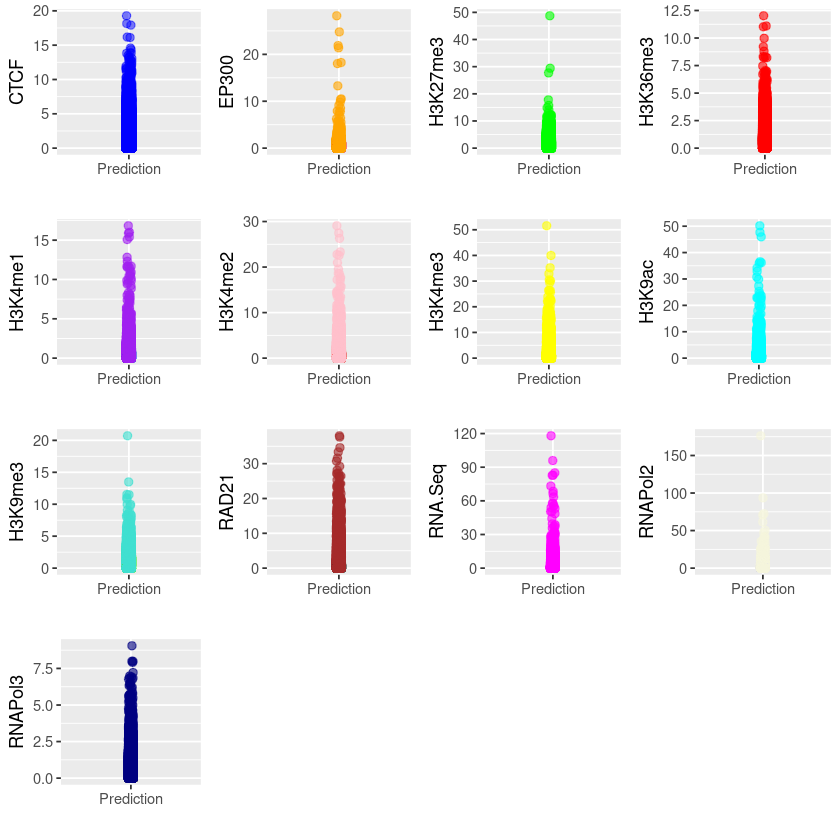

In [4]:
# --- K-Means Clustering --- #

requiredPackages <- c("tidyverse", "gridExtra")
newPackages <- requiredPackages[!(requiredPackages %in% installed.packages()[,"Package"])]
if(length(newPackages)) install.packages(newPackages,
                                         repos = "https://mirrors.tuna.tsinghua.edu.cn/CRAN/",
                                         dependencies = TRUE)
suppressPackageStartupMessages(library(tidyverse))
suppressPackageStartupMessages(library(gridExtra))

# --- Distribution of each variable --- #

plot1 <- one %>% 
  ggplot(aes(x = "Prediction", y = CTCF)) + 
  geom_jitter(width = .025, height = 0, size = 2, alpha = .5, color = "blue") +
  labs(x = "", y="CTCF")

plot2 <-  one %>%
  ggplot(aes(x = "Prediction", y = EP300)) + 
  geom_jitter(width = .02, height = 0, size = 2, alpha = .6,  color = "orange") +
  labs(x = "", y="EP300")

plot3 <-  one %>%
  ggplot(aes(x = "Prediction", y = H3K27me3)) + 
  geom_jitter(width = .02, height = 0, size = 2, alpha = .6,  color = "green") +
  labs(x = "", y="H3K27me3")

plot4 <-  one %>%
  ggplot(aes(x = "Prediction", y = H3K36me3)) + 
  geom_jitter(width = .02, height = 0, size = 2, alpha = .6,  color = "red") +
  labs(x = "", y="H3K36me3")

plot5 <-  one %>%
  ggplot(aes(x = "Prediction", y = H3K4me1)) + 
  geom_jitter(width = .02, height = 0, size = 2, alpha = .6,  color = "purple") +
  labs(x = "", y="H3K4me1")

plot6 <-  one %>%
  ggplot(aes(x = "Prediction", y = H3K4me2)) + 
  geom_jitter(width = .02, height = 0, size = 2, alpha = .6,  color = "pink") +
  labs(x = "", y="H3K4me2")

plot7 <-  one %>%
  ggplot(aes(x = "Prediction", y = H3K4me3)) + 
  geom_jitter(width = .02, height = 0, size = 2, alpha = .6,  color = "yellow") +
  labs(x = "", y="H3K4me3")

plot8 <-  one %>%
  ggplot(aes(x = "Prediction", y = H3K9ac)) + 
  geom_jitter(width = .02, height = 0, size = 2, alpha = .6,  color = "cyan") +
  labs(x = "", y="H3K9ac")

plot9 <-  one %>%
  ggplot(aes(x = "Prediction", y = H3K9me3)) + 
  geom_jitter(width = .02, height = 0, size = 2, alpha = .6,  color = "turquoise") +
  labs(x = "", y="H3K9me3")

plot10 <-  one %>%
  ggplot(aes(x = "Prediction", y = RAD21)) + 
  geom_jitter(width = .02, height = 0, size = 2, alpha = .6,  color = "brown") +
  labs(x = "", y="RAD21")

plot11 <-  one %>%
  ggplot(aes(x = "Prediction", y = RNA.Seq)) + 
  geom_jitter(width = .02, height = 0, size = 2, alpha = .6,  color = "magenta") +
  labs(x = "", y="RNA.Seq")

plot12 <-  one %>%
  ggplot(aes(x = "Prediction", y = RNAPol2)) + 
  geom_jitter(width = .02, height = 0, size = 2, alpha = .6,  color = "beige") +
  labs(x = "", y="RNAPol2")

plot13 <-  one %>%
  ggplot(aes(x = "Prediction", y = RNAPol3)) + 
  geom_jitter(width = .02, height = 0, size = 2, alpha = .6,  color = "navy") +
  labs(x = "", y="RNAPol3")


grid.arrange(plot1, plot2, plot3, plot4, plot5, plot6, plot7, plot8, plot9, plot10, plot11, plot12, plot13)

We can reflect that the variables are quite assymetrical to each others in terms of their values.  

In [5]:
summary(one)

      chr             start                end               Class.x       
 chr2   :103583   Min.   :        1   Min.   :     2000   Hub    :    756  
 chr1   :102858   1st Qu.: 31124001   1st Qu.: 31126000   Non-Hub:1144498  
 chr4   : 81672   Median : 66072001   Median : 66074000                    
 chr3   : 75119   Mean   : 78667699   Mean   : 78669698                    
 chrX   : 65215   3rd Qu.:112099501   3rd Qu.:112101500                    
 chr5   : 61204   Max.   :249249752   Max.   :249250621                    
 (Other):655603                                                            
   Prediction           CTCF             EP300            H3K27me3      
 Hub    :    756   Min.   : 0.0000   Min.   : 0.0000   Min.   : 0.0000  
 Non-Hub:1144498   1st Qu.: 0.2549   1st Qu.: 0.0000   1st Qu.: 0.0000  
                   Median : 0.4172   Median : 0.4357   Median : 0.5293  
                   Mean   : 0.4844   Mean   : 0.4306   Mean   : 0.7009  
                   3rd Qu.:

Now, let us execute the k-means clustering algorithm with an abitrary value of 3 for <i> k </i>. It is known to us that there are just two classes that exist.

In [6]:
kmeans3 <- kmeans(one[, - c(1:5, 19)], centers = 3, nstart = 20)
cat("The within cluster sum of squares for this clustering is", (kmeans3$betweenss/kmeans3$totss)*100, "%")

The within cluster sum of squares for this clustering is 44.39574 %

The within cluster sum of squares is an important metric. It helps us determine how compact the clusters are, as in how similar are the elements of a cluster. The higher this percentage, the "cleaner" the clustering.

In [7]:
kmeans2 <- kmeans(one[, - c(1:5, 19)], centers = 2, nstart = 20)
cat("The within cluster sum of squares for this clustering is", (kmeans2$betweenss/kmeans2$totss)*100, "%")

The within cluster sum of squares for this clustering is 34.44852 %

Now the percentage has gone down to ~ 34 %. This run hasn't been any better.

<p align = "justify"> Understandably, it would be tedious to check for multiple values of <i> centers </i>, and we'll stick to the best estimate of 3 for now. Contrarily, we can explore another package, <a href = "https://github.com/o1iv3r/FeatureImpCluster" > FeatureImpCluster</a>, for eliciting the importance of variables. </p>

In [8]:
if(!require(devtools)) install.packages("devtools",
                                       dependencies = TRUE,
                                       repos = "https://mirrors.tuna.tsinghua.edu.cn/CRAN/")
suppressPackageStartupMessages(library(devtools))

if(!require(FeatureImpCluster)) install_github("o1iv3r/FeatureImpCluster")
suppressPackageStartupMessages(library(FeatureImpCluster))

Loading required package: devtools

Loading required package: usethis

Loading required package: FeatureImpCluster

Loading required package: data.table


Attaching package: ‘data.table’


The following object is masked from ‘package:purrr’:

    transpose


The following objects are masked from ‘package:dplyr’:

    between, first, last




Loading required package: flexclust

Loading required package: grid

Loading required package: lattice

Loading required package: modeltools

Loading required package: stats4



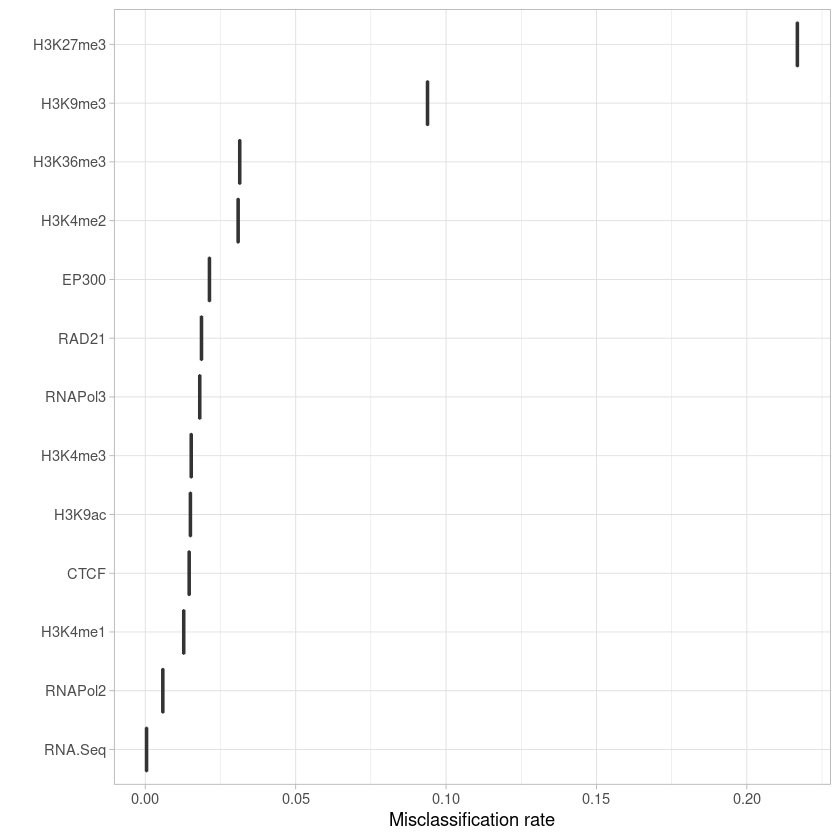

In [9]:
# --- Installing supporting package --- # 

if(!require(flexclust)) install.packages("flexclust",
                                         repos = "https://mirrors.tuna.tsinghua.edu.cn/CRAN/",
                                         dependencies = TRUE)
suppressPackageStartupMessages(library(flexclust))

# --- Running Algorithm --- #

set.seed(10)
res <- kcca(one[, -c(1:5, 19)], k = 3)
resultFeatureImp <- FeatureImpCluster(res, as.data.table(one[, -c(1:5, 19)]))
plot(resultFeatureImp, color= "none")

<p align = "justify"> What <i> FeatureImpCluster </i> helps us determine is the variable importance, via computation of the <i> permutation misclassification rate </i>. This metric for a variable is <b> the number of wrong cluster assignments divided by the number of observations (rows) given a permutation of the feature </b>. The mean misclassification rate over all iterations is interpreted as variable importance. </p>

In [10]:
PermMisClassRate(res, as.data.table(one[, - c(1:5, 19)]), varName = "H3K27me3")

[1] 0.2167353 0.2166873 0.2169300 0.2168628 0.2163520

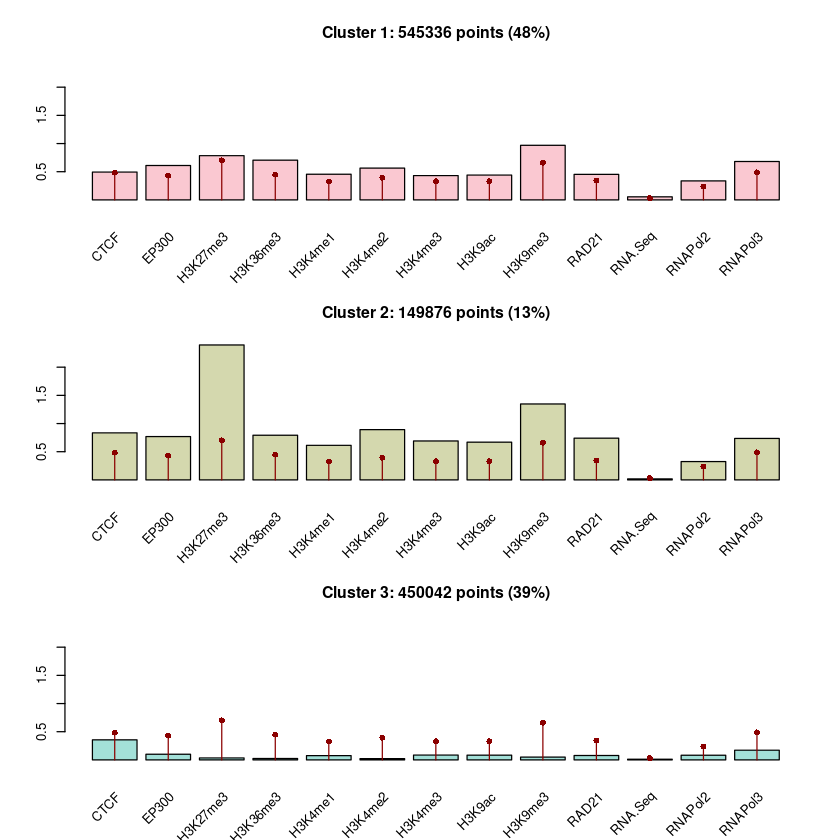

In [11]:
barplot(res)

<p align= "justify"> In this cell-type, we see that the run of clustering gives us a respectable cardinality of cohorts. A general observance is that the RNA-Seq reads are very dim, signifying little or no transcription. In correspondence, it could be fair to assume that both elements associated with activation and repression of gene regulation, being more or less expressive (as seen in Clusters 1 and 2), they kind of even out each other. Overall, it is observed that <b>H3K27me3</b> is the most crucial variable in determining the cluster-partitions, it's relatability to the transcription repression is widely known. </p>

### Verifying with the true positives from Random Forests

In [20]:
classDataRF <- read.table("./truePositives/helaRF.txt", header = T)
classDataUniqueRF <- unique(classDataRF)

two <- inner_join(classDataUniqueRF, featureDataUnique, by = c("chr", "start", "end"))

In [21]:
str(two)

'data.frame':	1476742 obs. of  19 variables:
 $ chr       : Factor w/ 24 levels "chr1","chr10",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ start     : int  1 2001 4001 6001 8001 10001 12001 14001 16001 18001 ...
 $ end       : int  2000 4000 6000 8000 10000 12000 14000 16000 18000 20000 ...
 $ Class.x   : Factor w/ 2 levels "Hub","Non-Hub": 2 2 2 2 2 2 2 2 2 2 ...
 $ Prediction: Factor w/ 2 levels "Hub","Non-Hub": 2 2 2 2 2 2 2 2 2 2 ...
 $ CTCF      : num  0 0 0 0 0 ...
 $ EP300     : num  0 0 0 0 0 ...
 $ H3K27me3  : num  0 0 0 0 0 ...
 $ H3K36me3  : num  0 0 0 0 0 ...
 $ H3K4me1   : num  0 0 0 0 0 ...
 $ H3K4me2   : num  0 0 0 0 0 ...
 $ H3K4me3   : num  0 0 0 0 0 ...
 $ H3K9ac    : num  0 0 0 0 0 ...
 $ H3K9me3   : num  0 0 0 0 0 ...
 $ RAD21     : num  0 0 0 0 0 ...
 $ RNA.Seq   : num  0 0 0 0 0 ...
 $ RNAPol2   : num  0 0 0 0 0 ...
 $ RNAPol3   : num  0 0 0 0 0.0796 ...
 $ Class.y   : Factor w/ 2 levels "Hub","Non-Hub": 2 2 2 2 2 2 2 2 2 2 ...


As before, we'll consider some arbitrary number of cluster and check for the magnitude of within-cluster sum of squares. The one with the highest shall be chosen subsequently for further analysis. 

In [14]:
kmeans3_1 <- kmeans(two[, - c(1:5, 19)], centers = 3, nstart = 20, iter.max = 20) 
# increasing the value of iter.max from 10 (default) to 20, for dealing with convergence issues in the model.

cat("The within cluster sum of squares for this clustering is", (kmeans3_1$betweenss/kmeans3_1$totss)*100, "%")

The within cluster sum of squares for this clustering is 45.23763 %

In [15]:
kmeans2_1 <- kmeans(two[, - c(1:5, 19)], centers = 2, nstart = 20)
cat("The within cluster sum of squares for this clustering is", (kmeans2_1$betweenss/kmeans2_1$totss)*100, "%")

The within cluster sum of squares for this clustering is 28.3097 %

In [16]:
kmeans4 <- kmeans(two[, - c(1:5, 19)], centers = 4, nstart = 20, iter.max = 20)
cat("The within cluster sum of squares for this clustering is", (kmeans4$betweenss/kmeans4$totss)*100, "%")

The within cluster sum of squares for this clustering is 54.5474 %

In [17]:
kmeans5 <- kmeans(two[, - c(1:5, 19)], centers = 5, nstart = 20, iter.max = 30)
cat("The within cluster sum of squares for this clustering is", (kmeans5$betweenss/kmeans5$totss)*100, "%")

The within cluster sum of squares for this clustering is 59.61561 %

Out of these clustering runs, we find that the cleanest of groupings happen with 5 clusters. Despite, let's explore this further with 3 clusters.

In [22]:
# --- Running Algorithm --- #

set.seed(11)
res1 <- kcca(two[, -c(1:5, 19)], k = 3)
resultFeatureImp1 <- FeatureImpCluster(res1, as.data.table(two[, -c(1:5, 19)]))

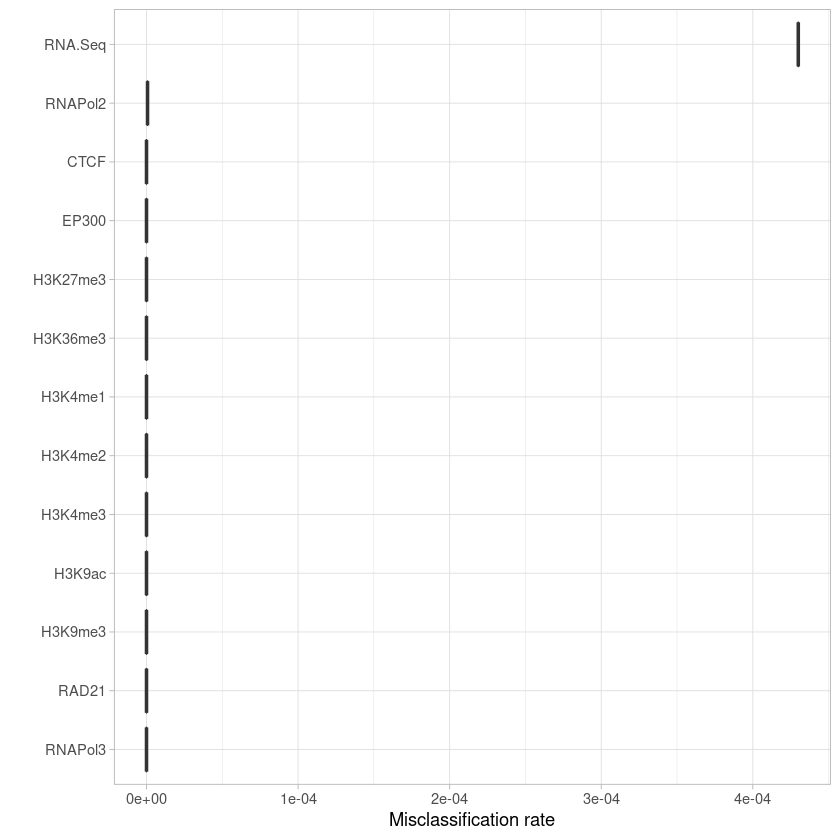

In [23]:
plot(resultFeatureImp1)

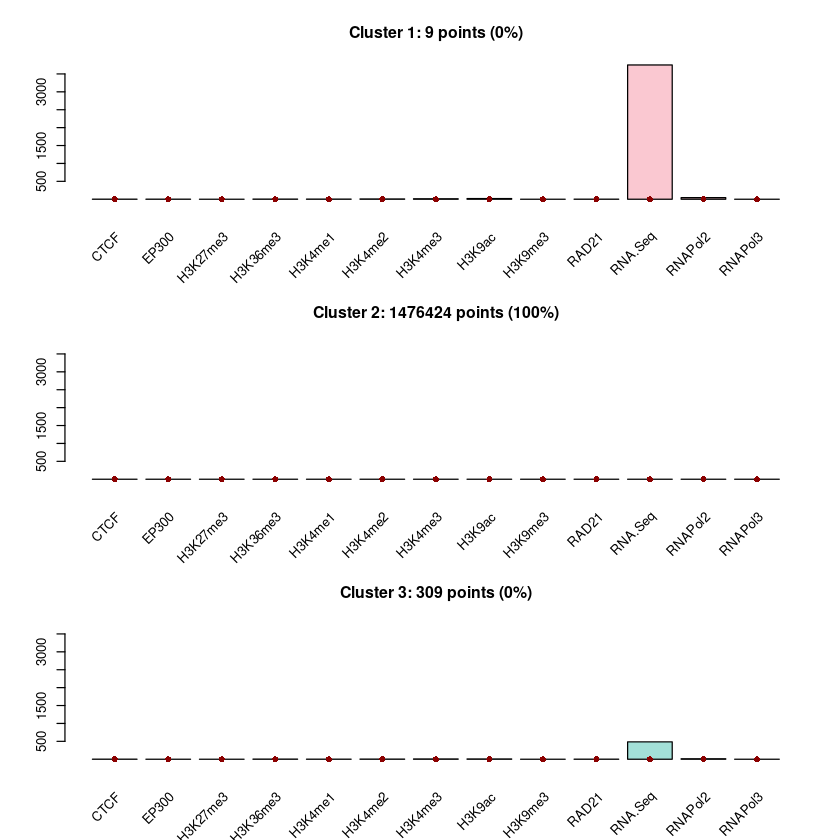

In [24]:
barplot(res1)

<p align = "justify"> <b>RNAPol2</b> is a key liner for the transcription factories. This marks active transcription and in the above scenario is witnessed to have a mild shoot in the first cluster. The point to debate is that it is hinged over a very minuscle fraction of the total data, but still is! It could arguably be noted as a function of <i> Hubs </i>, while <i> Non-Hubs</i> are still manifesting the bulk of data. This is a pointer that could again be viable given the cardinality of the individual class distribution. <b>RNA.Seq</b> is expressed notably.</p>

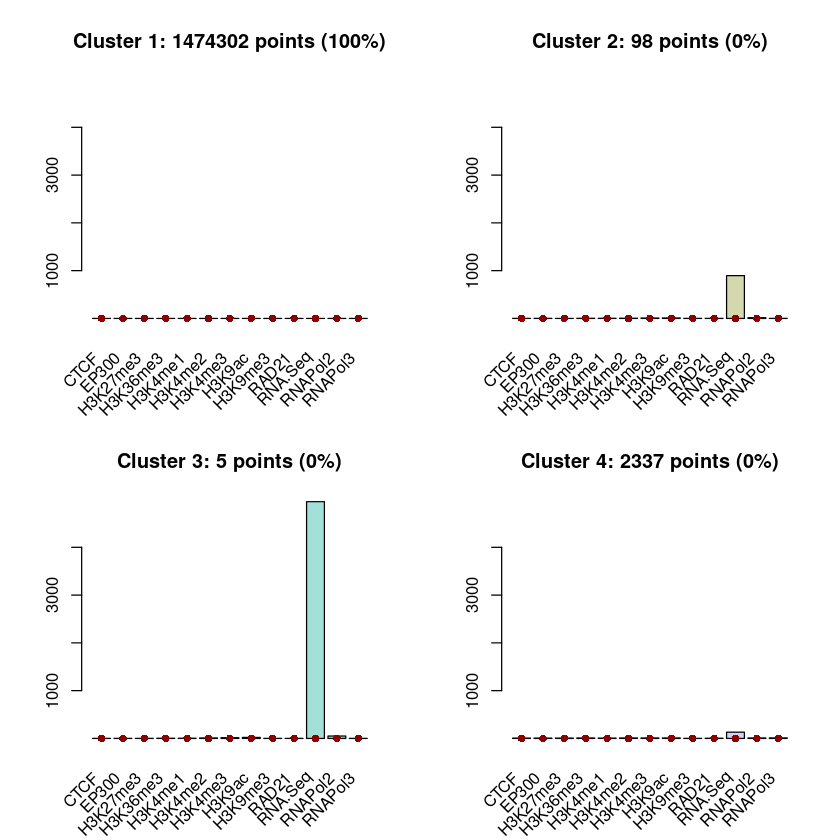

In [25]:
# --- Running Algorithm --- #
# --- 4 clusters --- #

set.seed(12)
res2 <- kcca(two[, -c(1:5, 19)], k = 4)
barplot(res2)

Cluster 1 could be deemed as a "dummy" cluster; we can't make anything out of it, despite it carrying roughly the whole of data. In Clusters 2 and 3 particularly, we discern notable bumps of RNA.Seq, particularly Cluster 3. There is a slight expression of RNA.Seq in Cluster 4.    

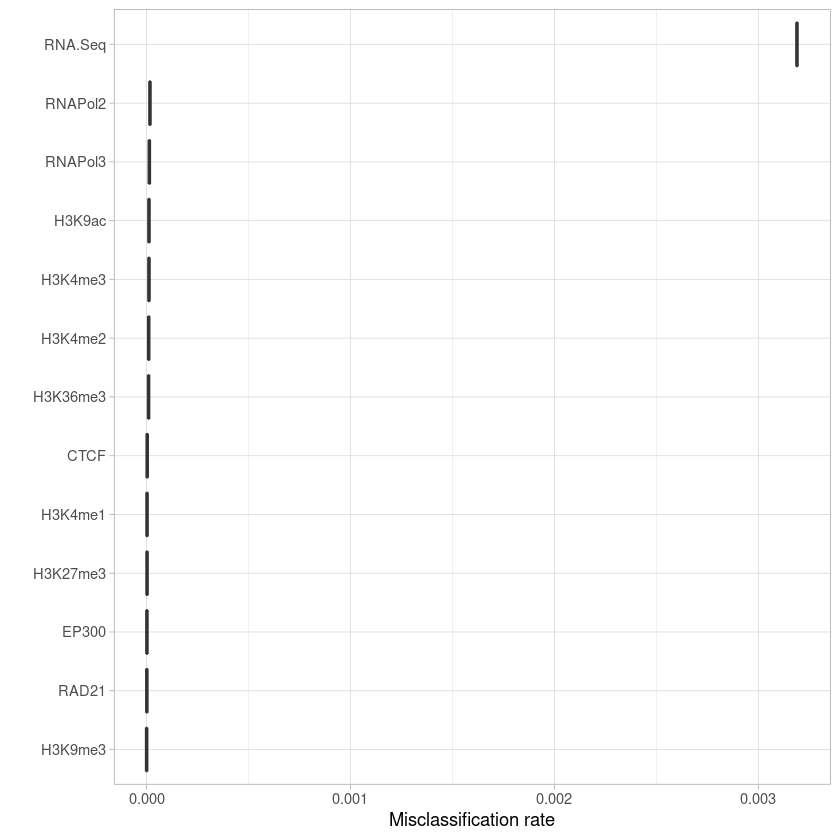

In [26]:
resultFeatureImp2 <- FeatureImpCluster(res2, as.data.table(two[, -c(1:5, 19)]))
plot(resultFeatureImp2)

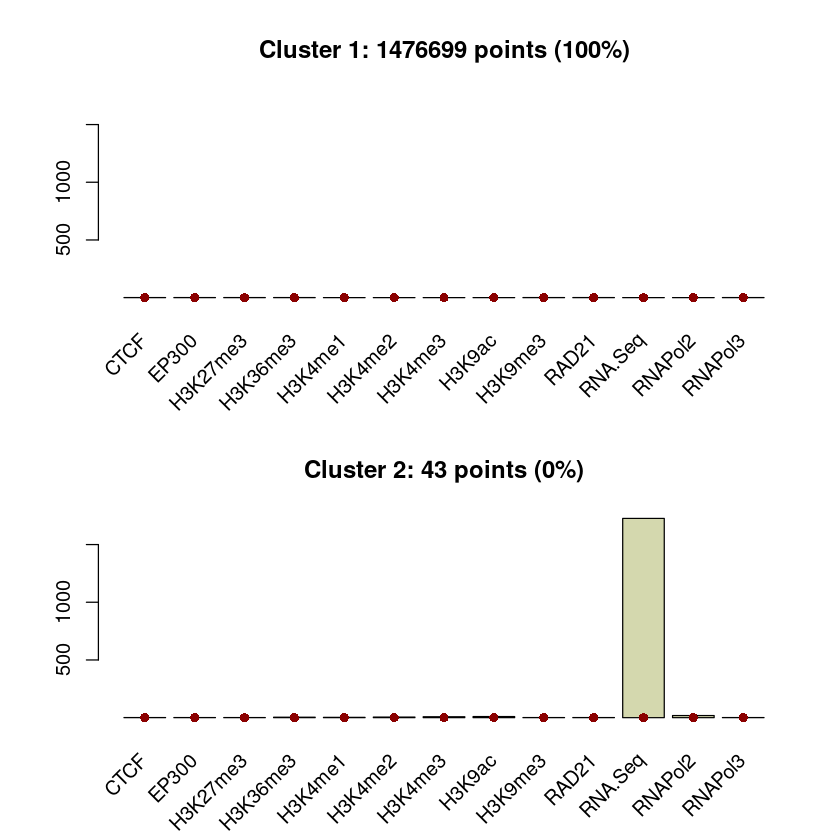

In [27]:
# --- Running Algorithm --- #
# --- 2 clusters --- #

set.seed(12)
res3 <- kcca(two[, -c(1:5, 19)], k = 2)
barplot(res3)

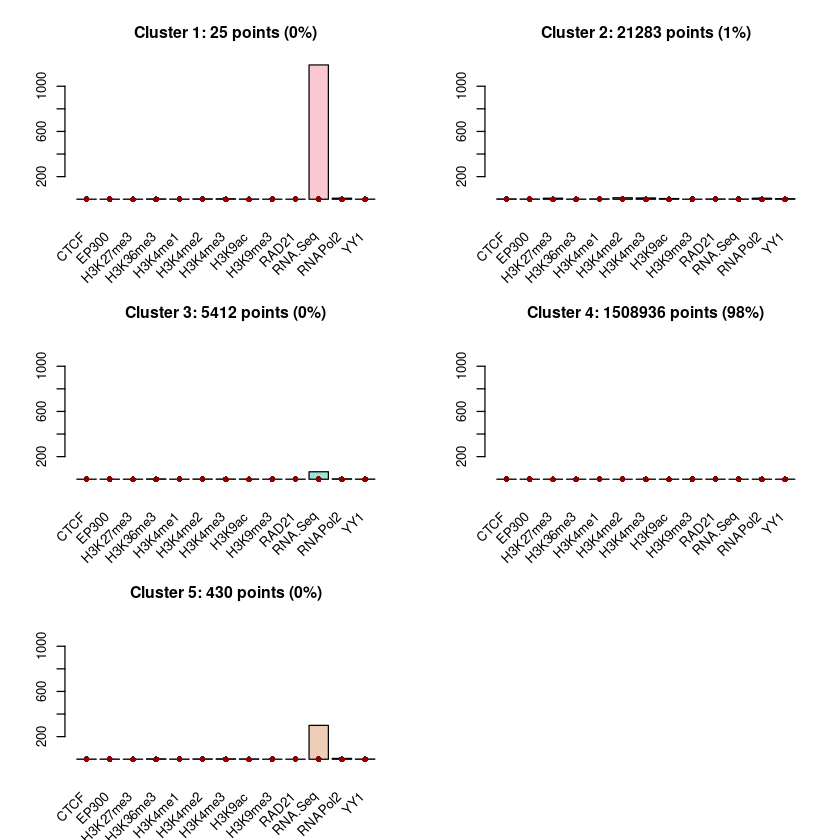

In [51]:
# --- Running Algorithm --- #
# --- 5 clusters --- #

set.seed(13)
res4 <- kcca(two[, -c(1:5, 19)], k = 5)
barplot(res4)

We observe that when the data is clustered into 5 units, we still have no expression from any feature in the cluster that bears the largest chunk of data. 

### Conclusion

<p align = "justify"> No concreteness could be associated with the results from the machine learning models. </p> 

In [28]:
sessionInfo()

R version 3.6.0 (2019-04-26)
Platform: x86_64-redhat-linux-gnu (64-bit)
Running under: CentOS Linux 7 (Core)

Matrix products: default
BLAS/LAPACK: /usr/lib64/R/lib/libRblas.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats4    grid      stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] flexclust_1.4-0         modeltools_0.2-23       lattice_0.20-41        
 [4] FeatureImpCluster_0.1.2 data.table_1.13.4       devtools_2.3.2         
 [7] usethis_1.6.3           gridExtra_2.3           forcats_0.5.0          
[10] stringr_1.4.0           purrr_0.3.4             readr_1.3.1            
[13